In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [3]:
def plot(model, num_input_tokens):
    plt.figure(figsize=(10, 4))
    all_num_output_tokens = [1, 2, 4, 8, 16, 32, 64]
    all_runtimes = []
    tokenizer = "ai21_j1" if model.startswith("ai21") else "huggingface_gpt2"
    random = "random" if model == "openai/davinci" else "None"
    try:
        for i, num_output_tokens in enumerate(all_num_output_tokens[::-1]):
            with open(
                os.path.join(
                    "../benchmark_output",
                    "runs",
                    "latest",
                    (
                        f"synthetic_efficiency:tokenizer={tokenizer},"
                        f"num_input_tokens={num_input_tokens},"
                        f"num_output_tokens={num_output_tokens},"
                        f"random={random},"
                        f"model={model.replace('/', '_')}"
                    ),
                    "per_instance_stats.json",
                ),
                "r",
            ) as f:
                runtimes = []
                metrics = json.load(f)
                for instance, metrics in metrics.items():
                    runtime = None
                    num_output_tokens_in_per_instance_metrics = None
                    for metric in metrics:
                        if metric["name"]["name"] == "inference_runtime":
                            runtime = metric["values"][0]
                        if metric["name"]["name"] == "num_output_tokens":
                            num_output_tokens_in_per_instance_metrics = metric["values"][0]
                    if num_output_tokens_in_per_instance_metrics == num_output_tokens:
                        if runtime is not None:
                            runtimes.append(runtime) 
                plt.scatter(runtimes, [i + 1 for _ in range(len(runtimes))])
                all_runtimes.append(runtimes)
        plt.yticks(
            list(range(1, len(all_num_output_tokens) + 1)), all_num_output_tokens[::-1]
        )
        plt.xlabel("Runtime (seconds)")
        plt.ylabel("Number of\noutput tokens")
        plt.xlim(0, None)
        print(f"{model}, prompt_size={num_input_tokens}")
        sns.despine()

        plt.savefig(f"../figures/per_instance_runtime_variance/{model.replace('/', '-')},num_input_tokens={num_input_tokens}.pdf",
                    bbox_inches="tight")
        plt.show()
    except:
        pass

ai21/j1-large, prompt_size=1


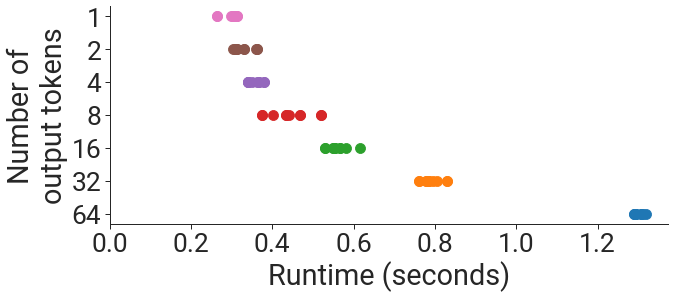

ai21/j1-large, prompt_size=512


<Figure size 720x288 with 0 Axes>

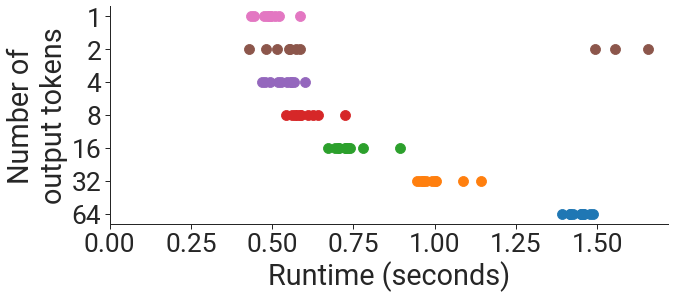

ai21/j1-large, prompt_size=1024


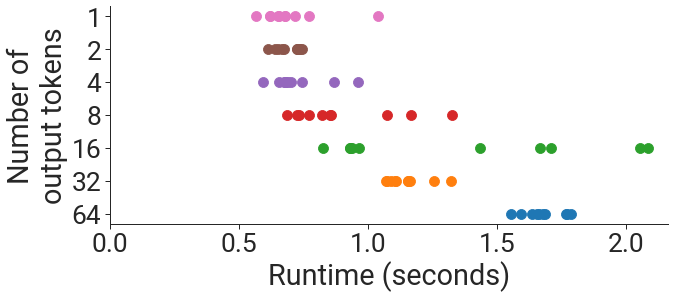

ai21/j1-large, prompt_size=1536


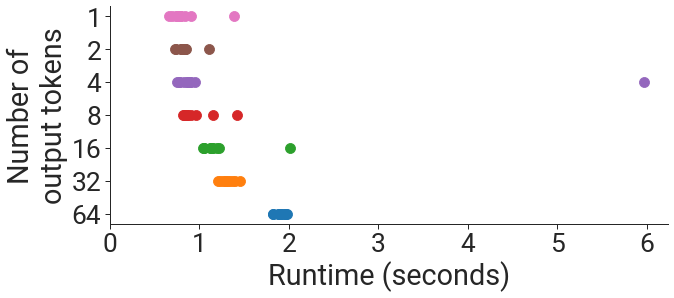

ai21/j1-grande, prompt_size=1


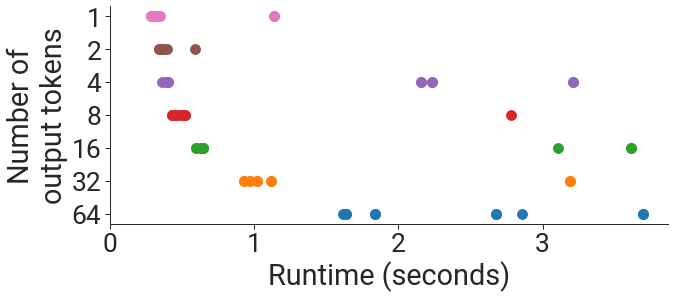

ai21/j1-grande, prompt_size=512


<Figure size 720x288 with 0 Axes>

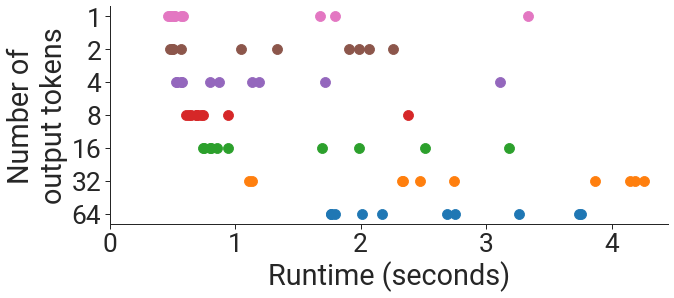

ai21/j1-grande, prompt_size=1024


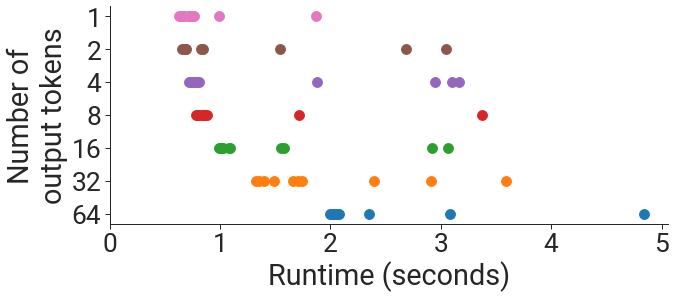

ai21/j1-grande, prompt_size=1536


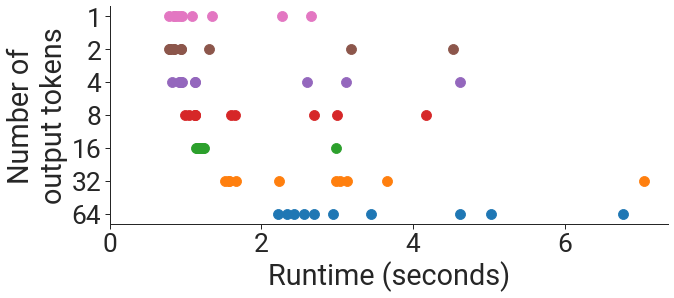

ai21/j1-jumbo, prompt_size=1


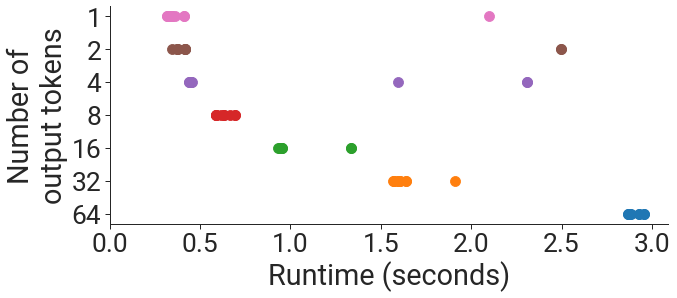

ai21/j1-jumbo, prompt_size=512


<Figure size 720x288 with 0 Axes>

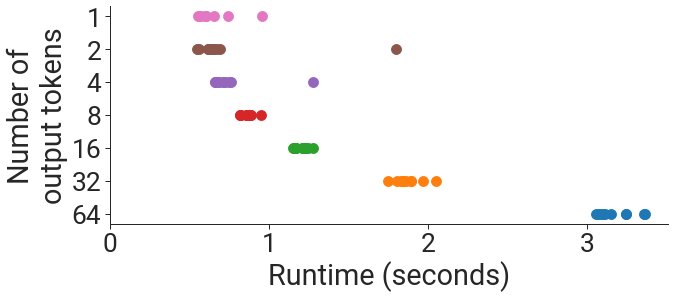

ai21/j1-jumbo, prompt_size=1024


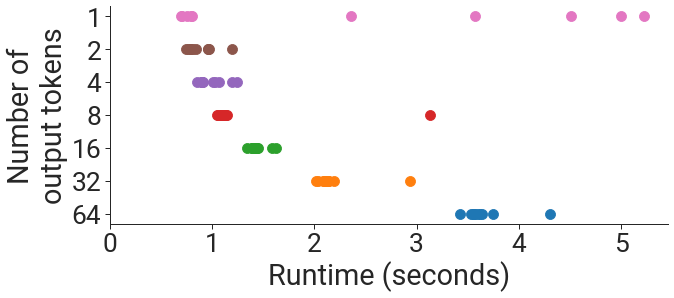

ai21/j1-jumbo, prompt_size=1536


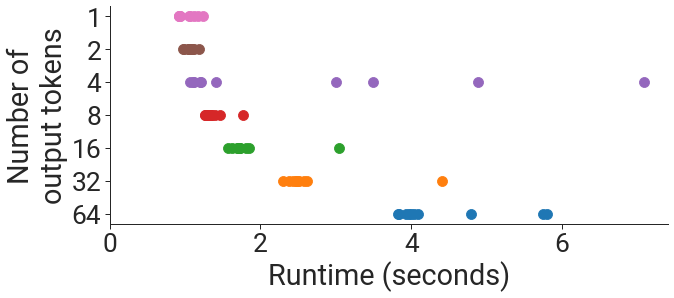

openai/davinci, prompt_size=1


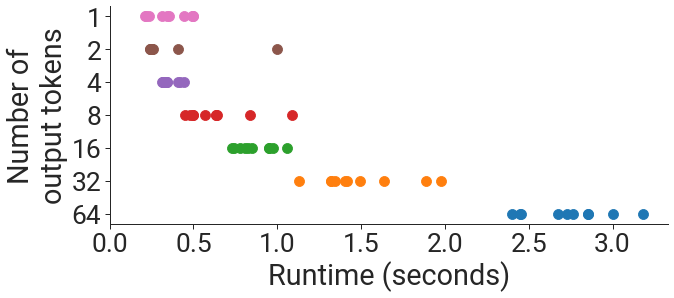

openai/davinci, prompt_size=256


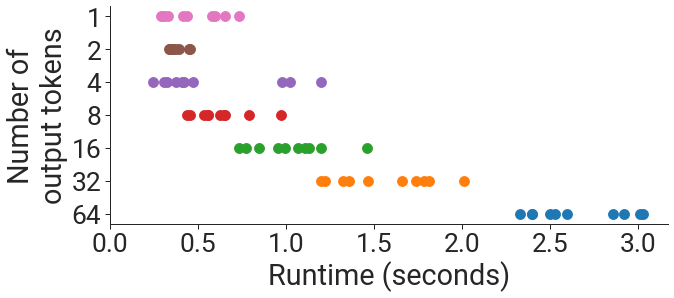

openai/davinci, prompt_size=512


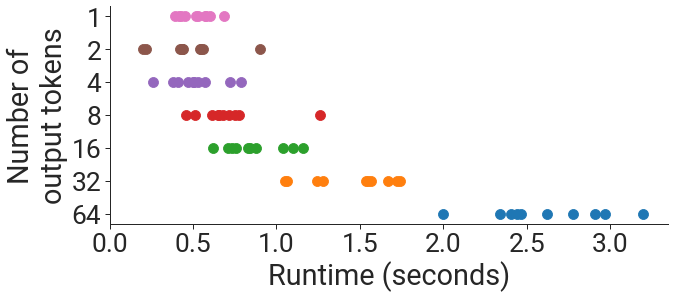

openai/davinci, prompt_size=1024


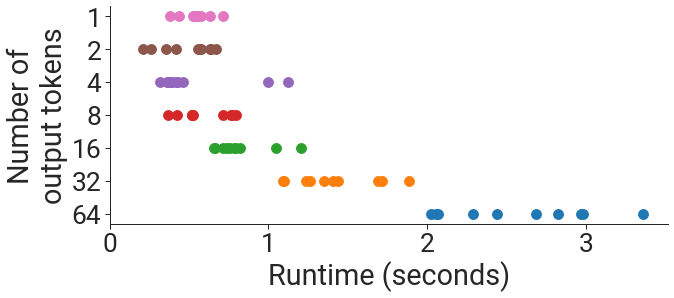

openai/davinci, prompt_size=1536


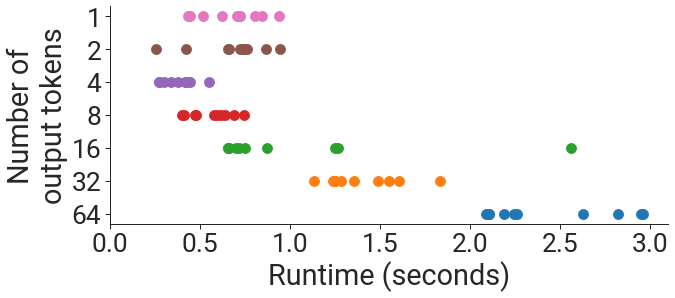

openai/text-davinci-001, prompt_size=1


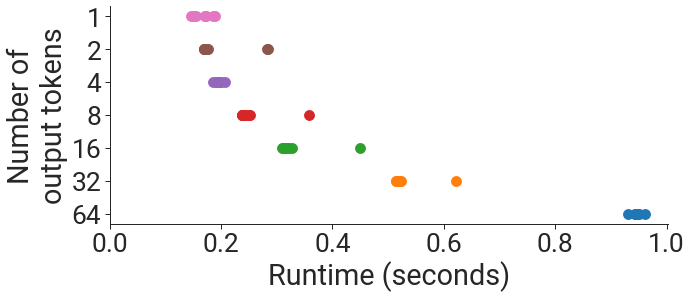

openai/text-davinci-001, prompt_size=256


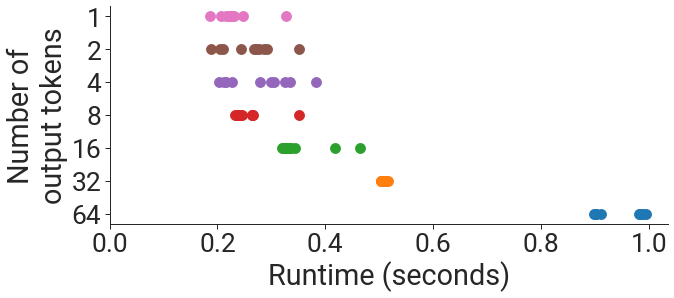

openai/text-davinci-001, prompt_size=512


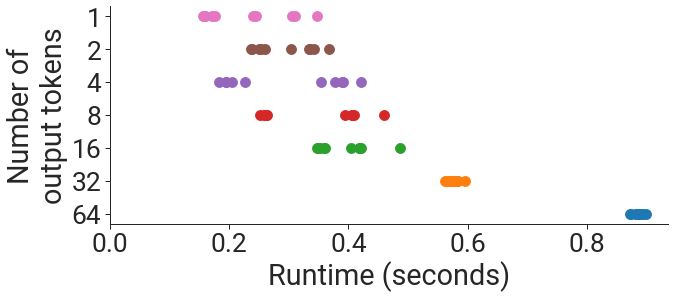

openai/text-davinci-001, prompt_size=1024


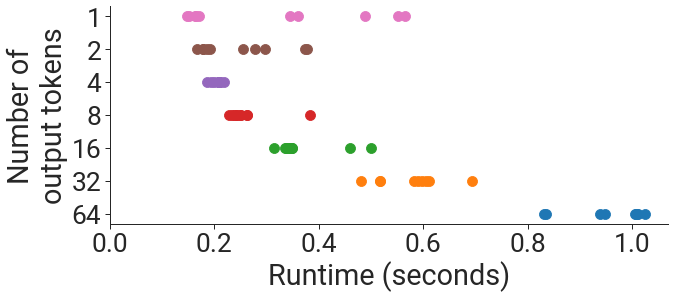

openai/text-davinci-001, prompt_size=1536


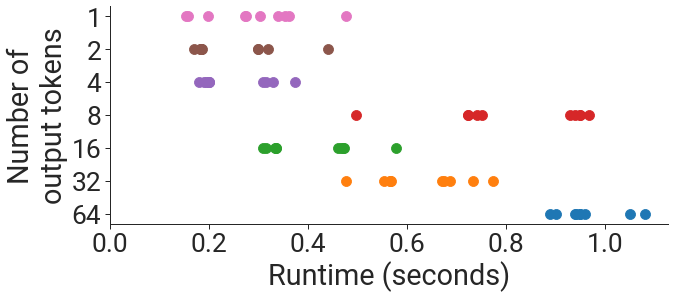

openai/text-davinci-002, prompt_size=1


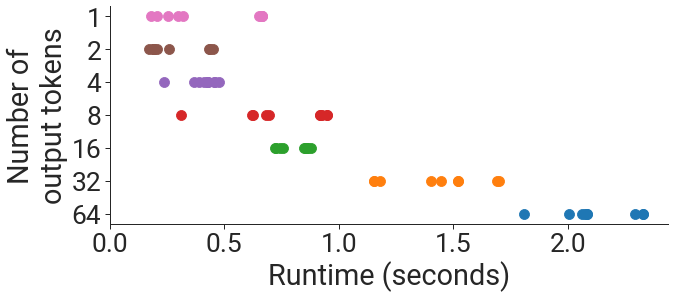

openai/text-davinci-002, prompt_size=256


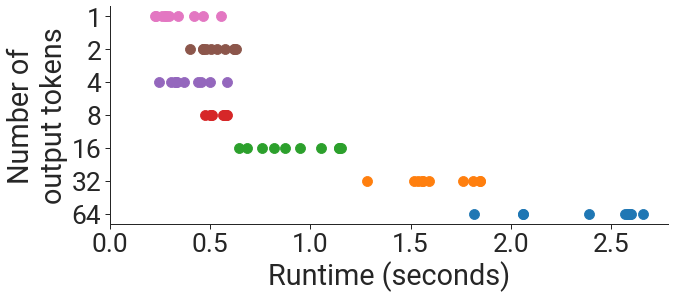

openai/text-davinci-002, prompt_size=512


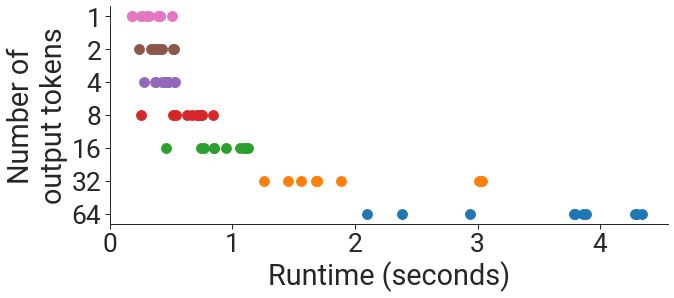

openai/text-davinci-002, prompt_size=1024


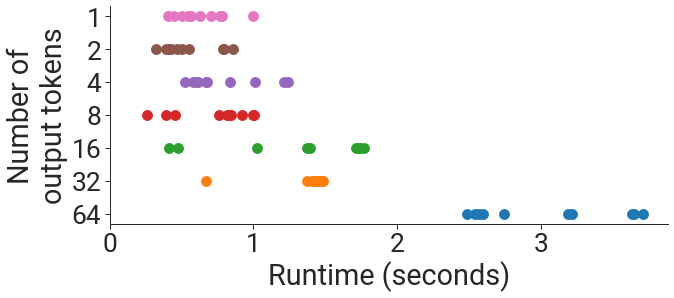

openai/text-davinci-002, prompt_size=1536


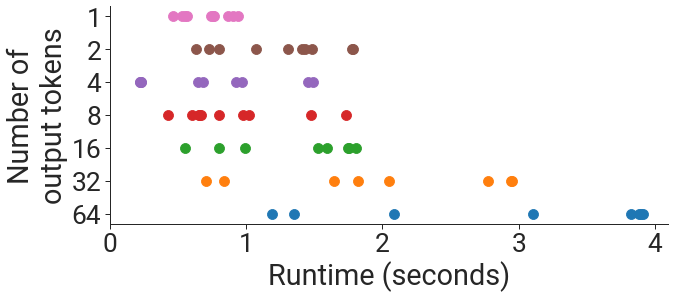

In [4]:
for model in ["ai21/j1-large", "ai21/j1-grande", "ai21/j1-jumbo",
              "openai/davinci", "openai/text-davinci-001", "openai/text-davinci-002"]:
    for num_input_tokens in [1, 256, 512, 1024, 1536]:
        plot(model, num_input_tokens)